# 11. K-Means Clustering  
**Author**: Your Name  
**Date**: June 9, 2025  

---

## Introduction

K-Means Clustering is an **unsupervised machine learning algorithm** used to partition a dataset into a pre-determined number of `k` distinct, non-overlapping subgroups (clusters). The main goal is to group similar data points together and discover underlying patterns. In K-Means, each cluster is represented by its center point, called the **centroid**.

It is an **iterative algorithm** that aims to minimize the **inertia** or **within-cluster sum-of-squares (WCSS)** – the sum of squared distances between each data point and its assigned cluster's centroid.

- **Type**: Unsupervised Learning  
- **Task**: Clustering  
- **Goal**: Partition `N` data points into `k` clusters such that each point belongs to the cluster with the nearest mean (centroid).

---

## Theoretical Background

### 1. Core Idea

K-Means seeks to find cluster centroids that **minimize inertia**. Each data point is assigned to the cluster whose centroid is **closest**.

---

### 2. Algorithm Steps

The K-Means algorithm follows these steps:

- **Initialization**:  
  Select `k` initial centroids (randomly or using `k-means++` for better results).

- **Assignment Step**:  
  Assign each data point to the nearest cluster centroid.  
  Formula:  
  \( C(i) = \arg\min_j \| x_i - \mu_j \|^2 \)

- **Update Step**:  
  Recalculate each cluster’s centroid as the mean of the data points assigned to it.  
  Formula:  
  \( \mu_j = \frac{1}{|S_j|} \sum_{x_i \in S_j} x_i \)

- **Iteration & Convergence**:  
  Repeat Assignment and Update steps until convergence (no change in assignments or centroids), or until a max number of iterations is reached.

---

### 3. Choosing `k` – The Number of Clusters

- `k` is a **hyperparameter** that must be specified **before** running the algorithm.
- Choosing `k` is challenging and often uses heuristics like:
  - **Elbow Method**
  - **Silhouette Score**

---

### 4. Inertia (WCSS – Within-Cluster Sum of Squares)

Inertia measures how internally coherent the clusters are.

- Formula:  
  \( \text{WCSS} = \sum_{j=1}^{k} \sum_{x_i \in S_j} \| x_i - \mu_j \|^2 \)

- Lower inertia indicates more **compact clusters**.  
  But note: **inertia always decreases** with larger `k`, so it’s not enough on its own to select `k`.

---

### 5. Initialization Methods

- **Random Initialization**:  
  Can lead to poor convergence due to bad starting points.

- **k-means++ (default in Scikit-learn)**:  
  Smarter method that spreads initial centroids apart. Results in better performance and stability.

---

### 6. Limitations and Challenges

- **Initialisation Sensitivity**:  
  Random centroids can lead to local optima. Use `n_init` in Scikit-learn to run multiple times.

- **Assumption of Cluster Shape**:  
  K-Means assumes **spherical, equally sized** clusters.

- **Need to Specify `k`**:  
  Must be selected in advance.

- **Outlier Sensitivity**:  
  Outliers can distort centroid locations.

- **Feature Scaling**:  
  Required due to distance-based computation. Apply standardisation or normalisation.

---

## Pros

- Easy to understand and implement.
- Scalable and efficient on large datasets.
- Performs well when clusters are spherical and well-separated.

---

## Cons

- Requires specifying `k` in advance.
- Sensitive to initialisation.
- Performs poorly on non-spherical or unevenly sized clusters.
- Affected by noise and outliers.
- Distance-based: feature scaling is essential.

---

## Use Cases

- **Customer Segmentation**  
- **Document Clustering**  
- **Image Segmentation / Compression**  
- **Anomaly Detection** (outliers far from any centroid)
- **Data preprocessing** or feature engineering.

---


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_blobs # For generating synthetic clustering data
from sklearn import metrics # For silhouette score

# Set a style for seaborn plots
sns.set_style('whitegrid')

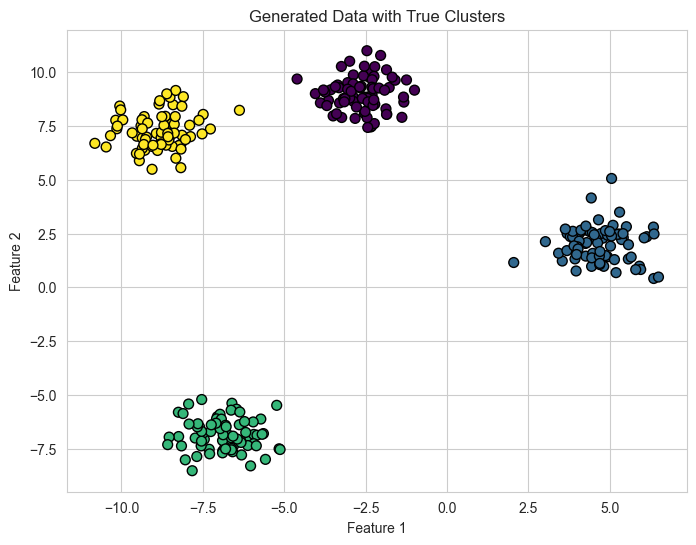

In [2]:
# Generate synthetic data with 4 distinct clusters
X_blobs, y_blobs_true = make_blobs(
    n_samples=300,
    centers=4,
    cluster_std=0.8, # Standard deviation of the clusters
    random_state=42,
    n_features=2
)

# Convert to DataFrame for easier handling (optional)
X_blobs_df = pd.DataFrame(X_blobs, columns=['Feature1', 'Feature2'])

# Visualize the generated data
plt.figure(figsize=(8, 6))
plt.scatter(X_blobs_df['Feature1'], X_blobs_df['Feature2'], c=y_blobs_true, cmap='viridis', edgecolor='k', s=50)
plt.title('Generated Data with True Clusters')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

## Data Preprocessing: Feature Scaling

K-Means is a **distance-based algorithm**, meaning that it relies on distance metrics (typically Euclidean distance) to assign points to clusters. Therefore, **feature scaling is a critical preprocessing step** to ensure that all features contribute equally to the distance calculations.

### Why Scaling Matters

- Features with **larger numeric ranges** can dominate the distance metric.
- This can bias the clustering toward dimensions with larger scales.
- Unscaled features may cause incorrect cluster assignment and distorted results.

### Common Scaling Techniques

1. **Standardization (Z-score Normalisation)**  
   Transforms features to have zero mean and unit variance.  
   Formula:  
   \( z = \frac{x - \mu}{\sigma} \)

   - Most commonly used with K-Means.
   - Suitable when features follow a Gaussian-like distribution.

2. **Min-Max Scaling**  
   Scales features to a fixed range, usually \([0, 1]\).  
   Formula:  
   \( x' = \frac{x - \min(x)}{\max(x) - \min(x)} \)

   - Preserves the shape of the original distribution.
   - Useful when features need to stay within a bounded range.

3. **MaxAbs Scaling**  
   Scales data to the range \([-1, 1]\) by dividing by the maximum absolute value.

   - Useful for sparse data.
   - Does not shift/center the data.

4. **Robust Scaling**  
   Uses the median and interquartile range, making it robust to outliers.  
   Formula:  
   \( x' = \frac{x - \text{median}(x)}{\text{IQR}(x)} \)

   - Suitable when data contains outliers.

### When to Scale

- **Always scale before applying K-Means**.
- Particularly critical when:
  - Features are on **different units or scales** (e.g., age in years vs. income in £).
  - The dataset includes **outliers** or **non-normal distributions**.

### Summary

| Scaling Method     | Sensitive to Outliers? | Suitable for K-Means? | Notes                                      |
|--------------------|------------------------|------------------------|---------------------------------------------|
| StandardScaler     | Yes                    | ✅                     | Most common for K-Means                    |
| MinMaxScaler       | Yes                    | ✅                     | For features needing [0, 1] range          |
| MaxAbsScaler       | Moderate               | ✅                     | Preserves sparsity; bounded [-1, 1]        |
| RobustScaler       | No                     | ✅                     | Best if dataset contains many outliers     |

---

**Best Practice**:  
Use `StandardScaler` from Scikit-learn for most K-Means applications, unless your data has extreme outliers—then consider `RobustScaler`.



In [5]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_blobs_df)

# Convert scaled data back to DataFrame (optional, for inspection)
X_scaled_df = pd.DataFrame(X_scaled, columns=X_blobs_df.columns)
print("First 5 rows of scaled data:\n", X_scaled_df.head())

First 5 rows of scaled data:
    Feature1  Feature2
0 -1.106501  0.612343
1 -1.167674  0.672391
2  0.295773  0.837216
3 -0.696182 -1.427498
4 -1.347313  0.591921


# K-Means Clustering: Training, Evaluation & Visualisation

## 1. Model Training (K-Means)

We need to specify `n_clusters` (i.e., the value of `k`). Since we generated synthetic data with 4 centres, we'll use `k = 4`.


In [7]:

k_value = 4

kmeans = KMeans(
    n_clusters=k_value,
    init='k-means++',     # Smarter initialization
    n_init='auto',        # Avoids FutureWarning; default will be 10 in future versions
    max_iter=300,
    random_state=42
)

# Fit the model to the scaled data
kmeans.fit(X_scaled_df)

print("K-Means model trained.")


K-Means model trained.


In [8]:
# Get cluster assignments
cluster_labels = kmeans.labels_

# Get centroid coordinates (in scaled space)
centroids = kmeans.cluster_centers_

# Add cluster labels to the original and scaled DataFrames
X_blobs_df['KMeans_Cluster'] = cluster_labels
X_scaled_df['KMeans_Cluster'] = cluster_labels

print(f"\nFirst 5 data points with their assigned clusters:\n{X_scaled_df.head()}")

# Optional: Convert centroids back to original feature space
centroids_original_space = scaler.inverse_transform(centroids)
# print("\nCentroids (original scale):\n", centroids_original_space)



First 5 data points with their assigned clusters:
   Feature1  Feature2  KMeans_Cluster
0 -1.106501  0.612343               3
1 -1.167674  0.672391               3
2  0.295773  0.837216               0
3 -0.696182 -1.427498               1
4 -1.347313  0.591921               3


In [9]:

# 1. Inertia (WCSS)
inertia = kmeans.inertia_
print(f"\nInertia (WCSS) for k={k_value}: {inertia:.2f}")

# 2. Silhouette Score
silhouette_avg = metrics.silhouette_score(X_scaled_df.drop('KMeans_Cluster', axis=1), cluster_labels)
print(f"Silhouette Score for k={k_value}: {silhouette_avg:.3f}")



Inertia (WCSS) for k=4: 11.32
Silhouette Score for k=4: 0.839


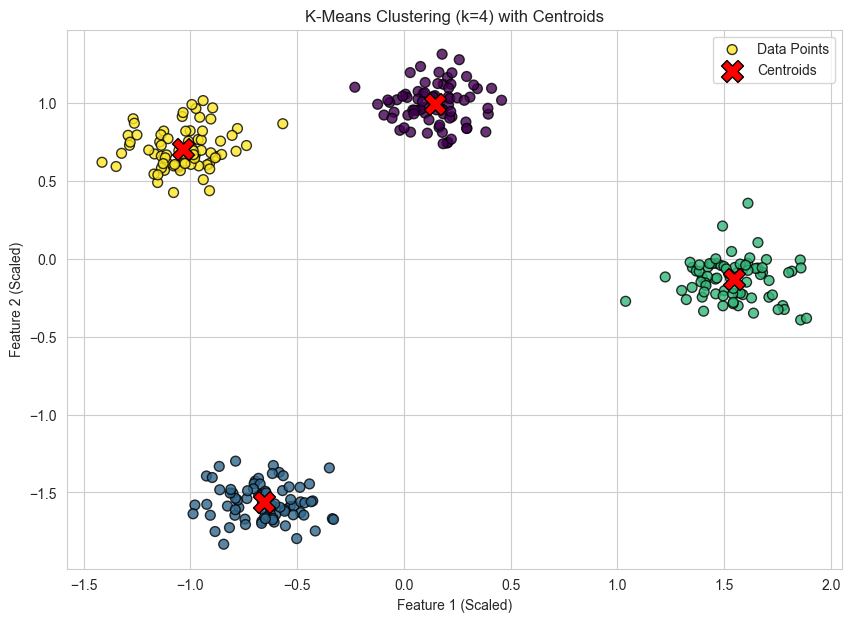

In [10]:

plt.figure(figsize=(10, 7))

# Plot the data points by assigned cluster
plt.scatter(
    X_scaled_df['Feature1'], X_scaled_df['Feature2'],
    c=X_scaled_df['KMeans_Cluster'],
    cmap='viridis',
    edgecolor='k',
    s=50,
    alpha=0.8,
    label='Data Points'
)

# Plot centroids
plt.scatter(
    centroids[:, 0], centroids[:, 1],
    s=250,
    c='red',
    marker='X',
    edgecolor='black',
    label='Centroids'
)

plt.title(f'K-Means Clustering (k={k_value}) with Centroids')
plt.xlabel('Feature 1 (Scaled)')
plt.ylabel('Feature 2 (Scaled)')
plt.legend()
plt.grid(True)
plt.show()


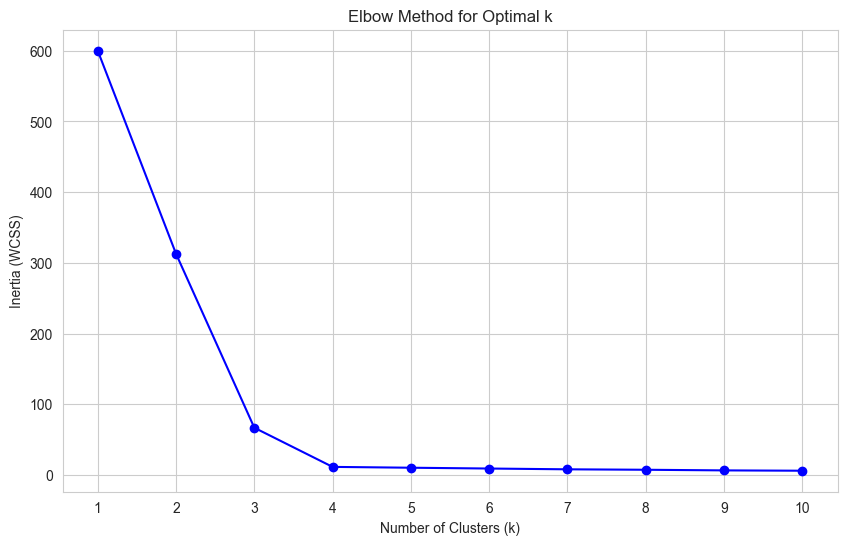

In [11]:
inertia_values = []
k_range = range(1, 11)

for k_test in k_range:
    kmeans_test = KMeans(n_clusters=k_test, init='k-means++', n_init='auto', random_state=42)
    kmeans_test.fit(X_scaled_df.drop('KMeans_Cluster', axis=1, errors='ignore'))
    inertia_values.append(kmeans_test.inertia_)

# Plot Inertia vs k
plt.figure(figsize=(10, 6))
plt.plot(k_range, inertia_values, marker='o', linestyle='-', color='blue')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (WCSS)')
plt.xticks(k_range)
plt.grid(True)
plt.show()


For k = 2, Silhouette Score = 0.570
For k = 3, Silhouette Score = 0.764
For k = 4, Silhouette Score = 0.839
For k = 5, Silhouette Score = 0.709
For k = 6, Silhouette Score = 0.577
For k = 7, Silhouette Score = 0.456
For k = 8, Silhouette Score = 0.465
For k = 9, Silhouette Score = 0.351
For k = 10, Silhouette Score = 0.353


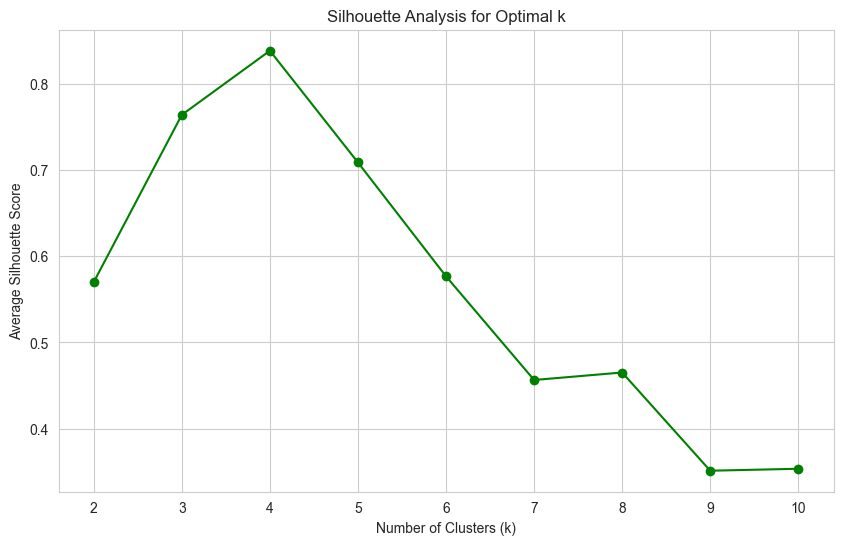

In [12]:
silhouette_scores = []
k_range = range(2, 11)  # Silhouette is undefined for k=1

for k_test in k_range:
    kmeans_test = KMeans(n_clusters=k_test, init='k-means++', n_init='auto', random_state=42)
    labels_test = kmeans_test.fit_predict(X_scaled_df.drop('KMeans_Cluster', axis=1, errors='ignore'))
    silhouette_avg = metrics.silhouette_score(X_scaled_df.drop('KMeans_Cluster', axis=1, errors='ignore'), labels_test)
    silhouette_scores.append(silhouette_avg)
    print(f"For k = {k_test}, Silhouette Score = {silhouette_avg:.3f}")

# Plot Silhouette Scores
plt.figure(figsize=(10, 6))
plt.plot(k_range, silhouette_scores, marker='o', linestyle='-', color='green')
plt.title('Silhouette Analysis for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Average Silhouette Score')
plt.xticks(k_range)
plt.grid(True)
plt.show()


- **K-Means** partitions data into `k` clusters based on distance to centroids, minimising within-cluster sum-of-squares (inertia).
- Requires `k` to be specified in advance.
- **Feature scaling is essential** for accurate clustering results.
- Use **Inertia (WCSS)** and **Silhouette Score** to evaluate model quality.
- Tools for choosing `k`: Elbow Method (plot WCSS) and Silhouette Analysis (plot scores).
- Performs best on **spherical, well-separated** clusters; sensitive to initialisation and outliers.
